In [73]:
import os
import warnings
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\analyse_csv.csv" 
df_final = pd.read_csv(file_path)

In [74]:
file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\area_analyse\square_meter_csv.csv" 
df_square_meter = pd.read_csv(file_path)

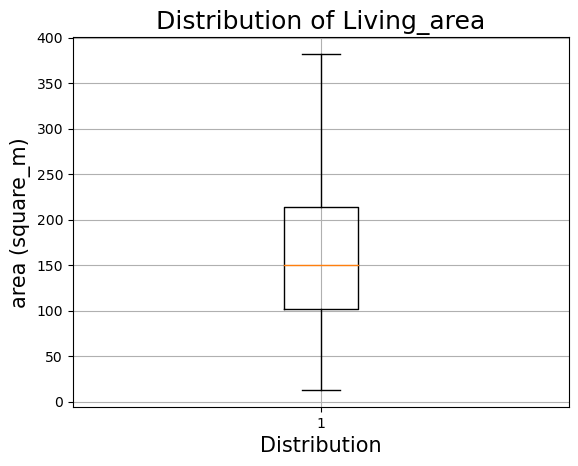

In [75]:
plt.boxplot(df_final['Living_Area'], showfliers=False)
plt.xlabel('Distribution', fontsize=15)
plt.ylabel("area (square_m)", fontsize=15)

plt.title('Distribution of Living_area', fontsize=18)
plt.grid(True)

plt.show()

In [76]:
#delete outliers
df_final = df_final[df_final['Living_Area'] < 400]

<function matplotlib.pyplot.show(close=None, block=None)>

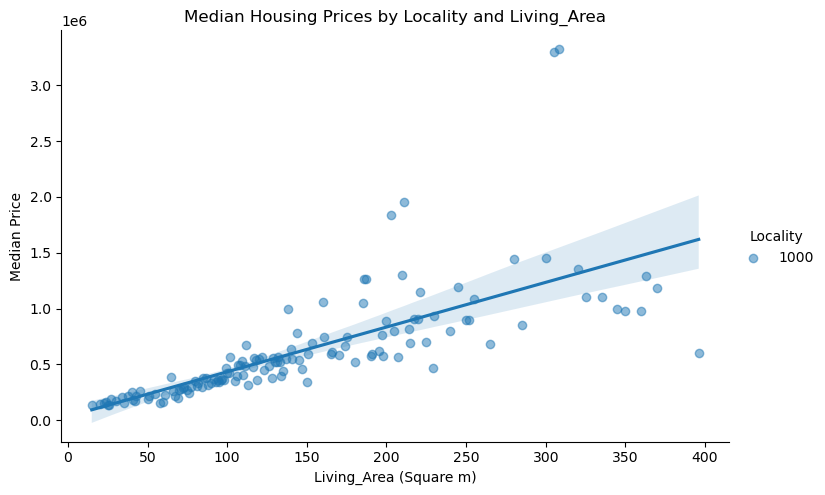

In [77]:
groupby_area = df_final.groupby(["Locality" , "Living_Area"])["Price"].median().reset_index()

desired_localities = df_square_meter.head(1).reset_index()['Locality'].tolist()
groupby_area = groupby_area.loc[groupby_area['Locality'].isin(desired_localities)]

sns.lmplot(x="Living_Area", y="Price", hue="Locality", data=groupby_area, scatter_kws={'alpha':0.5}, aspect=1.5)

plt.xlabel('Living_Area (Square m)')
plt.ylabel('Median Price')
plt.title('Median Housing Prices by Locality and Living_Area')

plt.show

We see that we can have a high relation between the living area and the price, we have the same results with the garden arrea and the terrace area, let's try to increase the precision of this line:

C:\Users\Sacha\miniconda3\lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

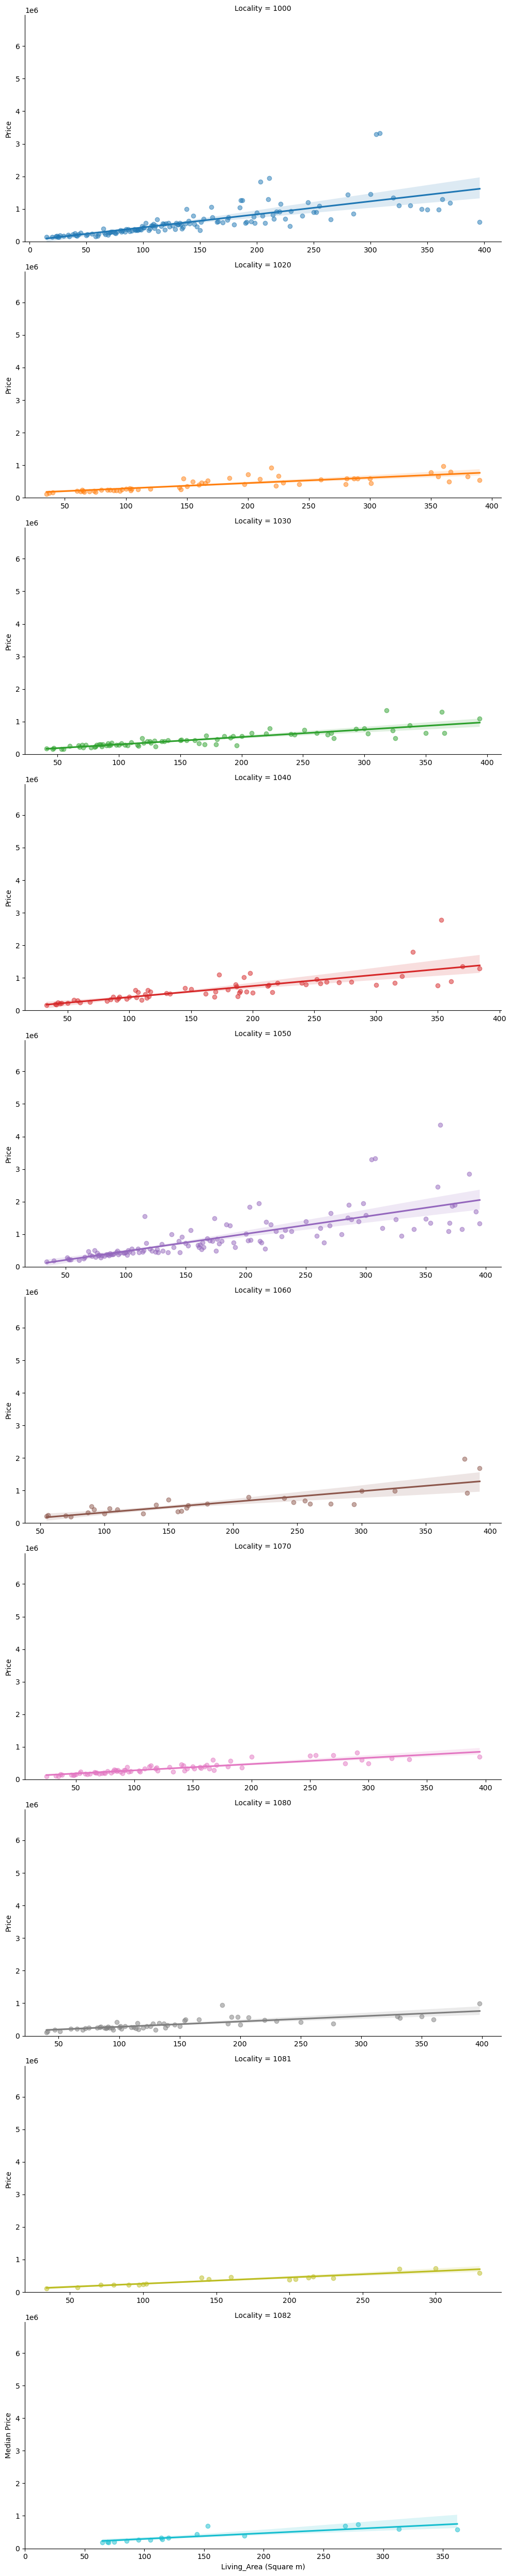

In [78]:
groupby_area = df_final.groupby(["Locality", "Living_Area"])["Price"].median().reset_index()

desired_localities = df_square_meter.head(10).reset_index()['Locality'].tolist()
groupby_area = groupby_area.loc[groupby_area['Locality'].isin(desired_localities)]

#sns.lmplot(x="Living_Area", y="Price", hue="Locality",col="Type_of_property", row="Locality", data=groupby_area, scatter_kws={'alpha':0.5}, aspect=1.5)
sns.lmplot(x="Living_Area", y="Price", hue="Locality", row="Locality", data=groupby_area, scatter_kws={'alpha':0.5}, aspect=2, sharex=False)
plt.xlim(0, max(df_final["Living_Area"]))
plt.ylim(0, max(df_final["Price"]))

plt.xlabel('Living_Area (Square m)')
plt.ylabel('Median Price')

plt.savefig(r'.\images\liv_area_diff_loc.jpg')

plt.show